<a href="https://colab.research.google.com/github/VeroFrias93/TOPICO-DE-LA-INDUSTRIA-1/blob/main/PRACTICA_2_VERONICA_FRIAS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Veronica Marisela Frias Peralta
**e-mail:** veronica.frias6148@alumnos.udg.mx

## MODULES

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

##CLASSES

In [17]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

Actividad 1: Lévy distribution - N Curves (3 pts)


*   Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.

* Visualizar con plotly.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [18]:
from ast import List
std_motion_steps = 3.0
Levy_exponents = [0.1, 0.5, 1.0, 1.9]
beta = 0
n_steps = 1000
Levy_pdf = list()

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, n_steps)
for i in range(len(Levy_exponents)):
  Levy_pdf.append(np.array([levy_stable.pdf(j, alpha=Levy_exponents[i], beta=beta, loc=std_motion_steps) for j in aux_domain]))

In [19]:
fig_Levy_pdf = go.Figure()
for m in range(len(Levy_pdf)):

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y = Levy_pdf[m],
                                    marker = dict(size=2),
                                    line = dict(width=2),
                                    mode ="lines",
                                    name = "Levy_{}". format(Levy_exponents[m]),
                                    showlegend = True
                                    ))

fig_Levy_pdf.show()


In [20]:
Levy_exponent = 0.5
betas = [0, 0.25, 0.5, 0.75]
Levy_pdf2 = list()

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, n_steps)
for i in range(len(Levy_exponents)):
  Levy_pdf2.append(np.array([levy_stable.pdf(j, alpha=Levy_exponent, beta=betas[i], loc=std_motion_steps) for j in aux_domain]))

In [21]:
fig_Levy_pdf = go.Figure()
for m in range (len(Levy_pdf)):

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y= Levy_pdf2[m],
                                    marker = dict(size=2),
                                    line = dict(width=2),
                                    mode = "lines",
                                    name = "Levy_{}". format(Levy_exponents[m]),
                                    showlegend =True
                                    ))


fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.


[  0.49820556   1.86478647   2.70037047   2.91113408   4.71499243
   4.13011004  -0.64673103   6.43804042   0.64954724   4.69764455
   3.48248338   4.0845433    3.94532193   1.54486085   3.65897072
   4.01720203   2.97700061   4.79657286   1.94348883   3.62750388
   2.94380853   1.37510386   3.0199898    1.7334013    3.35837565
   4.85008788   2.28272889   3.55328452   0.52563162   6.37359988
   5.84372423   0.92490292   3.27941265   1.81712842   1.82143056
   3.88250369   3.59633784   4.07496692   2.26528689   1.83469052
   3.06149127   4.52875412   2.90503202   3.67608961   5.34076604
   5.47410747   1.12822949   3.33324283   2.18372462   2.17576358
   1.68635947   2.21955929   2.03195403   3.42718986   4.77719319
   1.5063317    1.86729981   3.40036662   0.88751349   5.80252622
   0.84005219   5.21366594   4.07691936   0.17169061   1.55249583
   3.63958489   3.23602853   1.45224662   0.16283727   2.93873287
   2.10600092   5.25505365   4.13778251   2.16016036   3.47626812
   1.79164

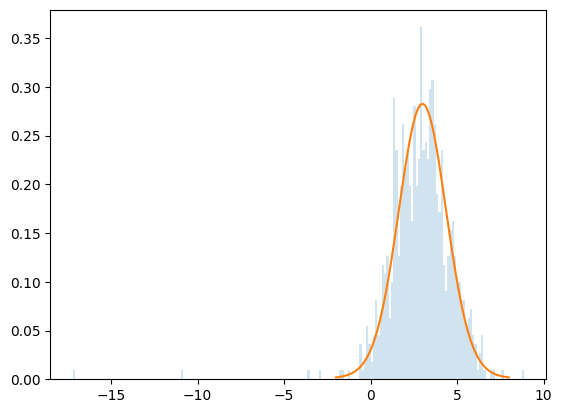

In [22]:
Levy_rvs = levy_stable.rvs(Levy_exponents[3], beta, loc=std_motion_steps, size=850)

plt.hist(Levy_rvs, bins=200, density=True, histtype="stepfilled", alpha=0.2, label="Levy walk histoi")
plt.plot(aux_domain, Levy_pdf[3])

print(Levy_rvs)

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [23]:
# Init variables
CRW_exponent_ = 0.7
n_steps_l = 850
s_pos_l = [0, 0]
#speed_l = 3

wrapcauchy_rvs_ = wrapcauchy.rvs(c=CRW_exponent_, loc=0, size=n_steps_l)
wrapcauchy_rvs_sum = wrapcauchy_rvs_
for n in range(len(wrapcauchy_rvs_)):
  for m in range(n):
    wrapcauchy_rvs_sum[n] += wrapcauchy_rvs_[m]

Levy_rvs_abs = abs(Levy_rvs)

#print(wrapcauchy_rvs_)
#print(wrapcauchy_rvs_sum)
# Init dataframe
BM_2d_df_l = pd.DataFrame(columns=['x_pos', 'y_pos'])

# Auxiliar para concatenar
temp_df_l = pd.DataFrame([{'x_pos': s_pos_l[0], 'y_pos': s_pos_l[1]}])

BM_2d_df_l = pd.concat([BM_2d_df_l, temp_df_l], ignore_index=True)

for i in range(n_steps_l-1):
  # Init velocity vector
  velocity_l = Vec2d(Levy_rvs_abs[i],0)
  velocity_l = velocity_l.rotated(wrapcauchy_rvs_[i])

  temp_df_l = pd.DataFrame([{'x_pos': BM_2d_df_l.x_pos[i] + velocity_l.x, 'y_pos': BM_2d_df_l.y_pos[i] + velocity_l.y}])
  BM_2d_df_l = pd.concat([BM_2d_df_l, temp_df_l], ignore_index=True)





In [24]:
# Time aux vector
times_l = np.linspace(0,1, n_steps)

#Init figure
fig_BM_3d_l = go. Figure()

# Plot
fig_BM_3d_l.add_trace(go.Scatter3d(x = BM_2d_df_l['x_pos'],
                                 y = BM_2d_df_l['y_pos'],
                                 z = times_l,
                                 marker = dict(size=2),
                                 line = dict(width=2),
                                 mode = 'lines',
                                 name = 'BM_2d with Levy',
                                 showlegend = True
                                 ))

# Figure parameters -- update layoud
fig_BM_3d_l.layout.update(title_text = 'BM trajectory in 3D',
                        autosize = False,
                        width = 900,
                        height = 900,
                        scene_camera=dict(
                            up=dict(x=0, y=1, z=0),
                            center=dict(x=0, y=0, z=0),
                            eye=dict(x=0, y=0, z=1),
                        ),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='z_pos (mm)')
                        ))

fig_BM_3d_l.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.

In [27]:
# Init variables
n_traj = 20
n_steps_w = 1000
s_pos_w = [0, 0]
speed_w = 3

BM_2d_df_ws = list()

for i in range(n_traj):
  QRW_exponent = round(random.uniform(0.05, 0.95), 2)
  # Init velocity vector
  velocity_w = Vec2d(speed_w, 0)

  # Generate vector of random values
  aux_domain_w = np.linspace(0, 2*np.pi, n_steps_w)
  wrapcauchy_rvs = wrapcauchy.rvs(QRW_exponent, size = n_steps_w)

  # Init dataframe
  BM_2d_df_w = pd.DataFrame(columns=['x_pos', 'y_pos'])

   # Auxiliar para concatenar
  temp_df_w = pd.DataFrame([{'x_pos': s_pos_w[0], 'y_pos': s_pos_w[1]}])

  BM_2d_df_w = pd.concat([BM_2d_df_w, temp_df_w], ignore_index=True)

  for j in range(n_steps_w-1):
    velocity_w = velocity_w.rotated(wrapcauchy_rvs[j])

    temp_df_w = pd.DataFrame([{'x_pos': BM_2d_df_w.x_pos[j] + velocity_w.x, 'y_pos': BM_2d_df_w.y_pos[j] + velocity_w.y}])
    BM_2d_df_w = pd.concat([BM_2d_df_w, temp_df_w], ignore_index=True)
    BM_2d_df_w.to_pickle('./BM_2d_w_{}.pkl'.format(i))
  BM_2d_df_ws.append(BM_2d_df_w)






In [28]:
# Time aux vector
times_w = np.linspace(0,1, n_steps)

# Init figure
fig_BM_3d_w = go.Figure()

# Plot
for k in range(n_traj):
  fig_BM_3d_w.add_trace(go.Scatter3d(x = BM_2d_df_ws[k]['x_pos'],
                                  y = BM_2d_df_ws[k]['y_pos'],
                                  z = times_w,
                                  marker = dict(size=2),
                                  line = dict(width=2),
                                  mode = 'lines',
                                  name = 'BM_2d_{}'.format(k),
                                  showlegend = True
                                  ))
fig_BM_3d_w.show()